# Import Library

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import utils 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import cv2
import imghdr

# Prepare Traning Data

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
filenames = os.listdir(r"C:\Users\hitesh sonar\OneDrive\Desktop\TOTAL\EDUNIX\Eduonix Tea\ASSIGEMNET\19 ASSIGNMENT 19\DS May - 05th Nov\Fire")
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'fire':
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001BFE820C6A0>>

In [6]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [7]:
df.head()

,filename,category
0,0.jpg,1
1,1.jpg,1
2,10.jpg,1
3,100.jpg,1
4,101.jpg,1


In [8]:
df.tail()

,filename,category
196,95.jpg,1
197,96.jpg,1
198,97.jpg,1
199,98.jpg,1
200,99.jpg,1


<Axes: >

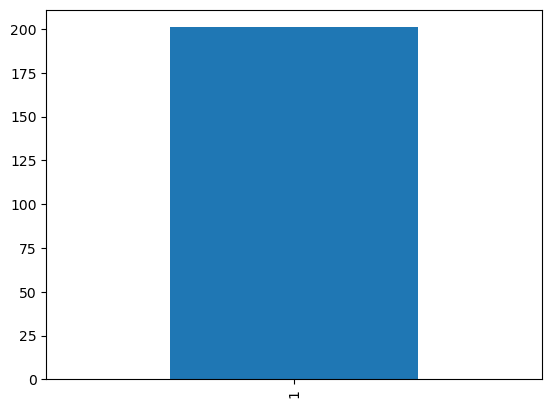

In [9]:
df['category'].value_counts().plot.bar()

In [10]:
df["category"]=df["category"].replace({1:'Nofire',0:'fire'})

In [11]:
df['category'].value_counts()

Nofire    201
Name: category, dtype: int64

# See sample image

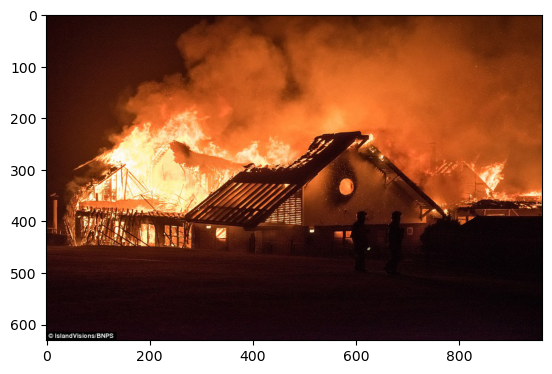

In [12]:
sample = random.choice(filenames)
image = load_img(r"C:\Users\hitesh sonar\OneDrive\Desktop\TOTAL\EDUNIX\Eduonix Tea\ASSIGEMNET\19 ASSIGNMENT 19\DS May - 05th Nov\Fire/"+sample)
plt.imshow(image)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 61, 61, 64)       

# Callbacks

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [14]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [15]:
df["category"] = df["category"].replace({0: 'NoFire', 1: 'Fire'}) 

In [16]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: >

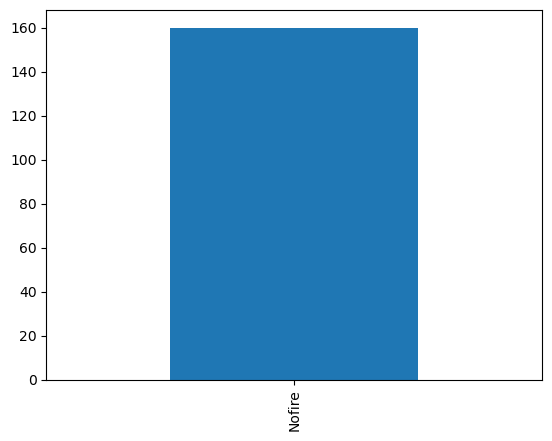

In [17]:
train_df['category'].value_counts().plot.bar()

<Axes: >

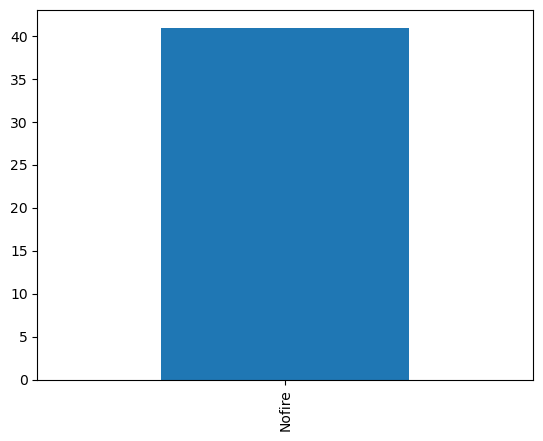

In [18]:
validate_df['category'].value_counts().plot.bar()

In [19]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Traning Generator

In [20]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    (r"C:\Users\hitesh sonar\OneDrive\Desktop\TOTAL\EDUNIX\Eduonix Tea\ASSIGEMNET\19 ASSIGNMENT 19\DS May - 05th Nov\Fire"),
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 160 validated image filenames belonging to 1 classes.


### Validation Generator

In [21]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    (r"C:\Users\hitesh sonar\OneDrive\Desktop\TOTAL\EDUNIX\Eduonix Tea\ASSIGEMNET\19 ASSIGNMENT 19\DS May - 05th Nov\Fire"), 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 41 validated image filenames belonging to 1 classes.


# See how our generator work

In [22]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    (r"C:\Users\hitesh sonar\OneDrive\Desktop\TOTAL\EDUNIX\Eduonix Tea\ASSIGEMNET\19 ASSIGNMENT 19\DS May - 05th Nov\Fire"),
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


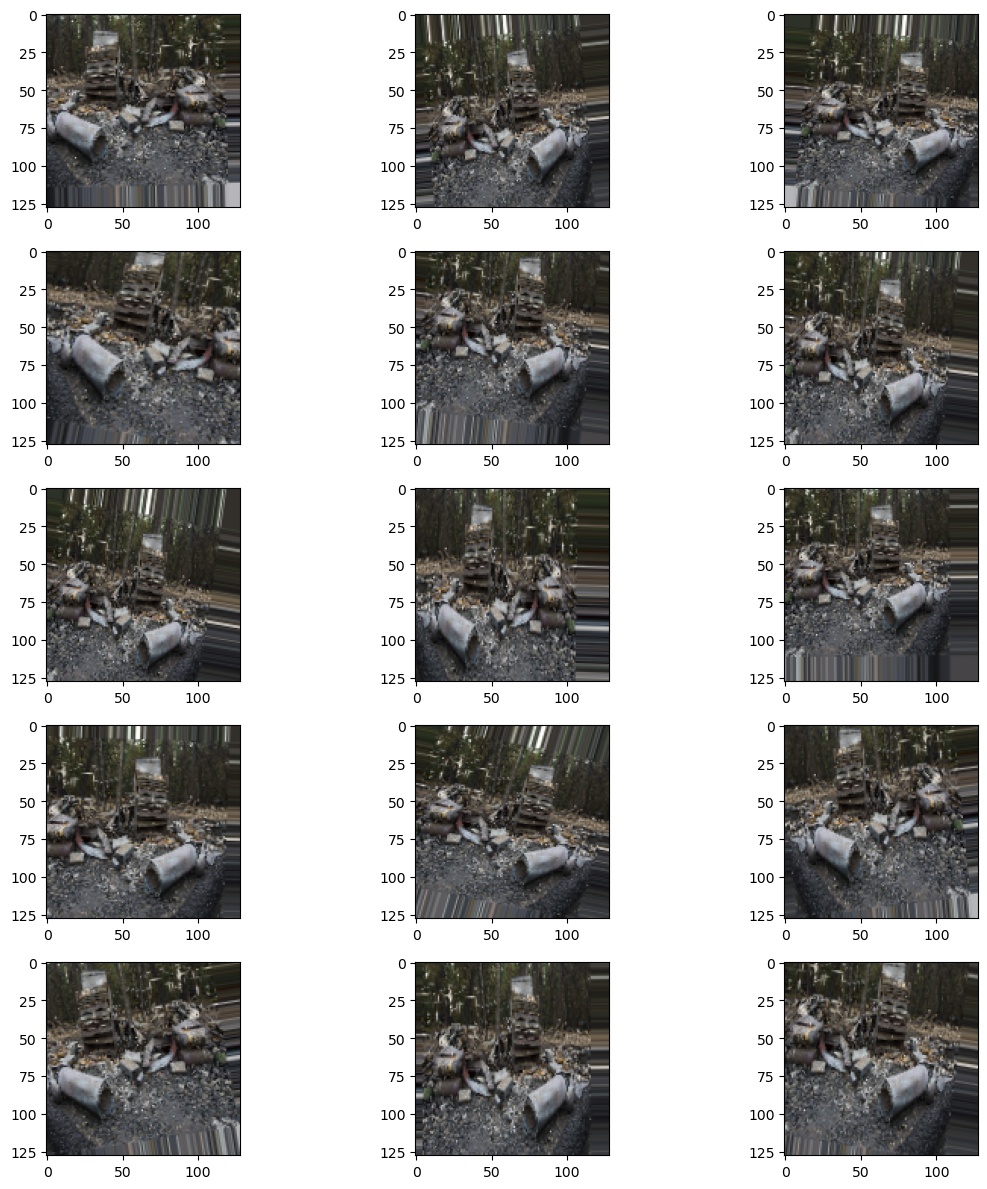

In [23]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fit Model

In [24]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)
model.save("model.h5")

Epoch 1/50
10/10 [==============================] - 25s 2s/step - loss: 3.5561 - accuracy: 0.4759 - val_loss: 1.5198 - val_accuracy: 0.7333 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - 19s 2s/step - loss: 2.6652 - accuracy: 0.5172 - val_loss: 2.1987 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 2.2476 - accuracy: 0.4483
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
10/10 [==============================] - 21s 2s/step - loss: 2.2476 - accuracy: 0.4483 - val_loss: 2.1167 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/50
10/10 [==============================] - 21s 2s/step - loss: 2.1709 - accuracy: 0.4828 - val_loss: 2.0165 - val_accuracy: 0.0000e+00 - lr: 5.0000e-04
Epoch 5/50
10/10 [==============================] - ETA: 0s - loss: 2.1272 - accuracy: 0.5241
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
10/10 [==============================] - 21

C:\Users\hitesh sonar\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Visualize Training

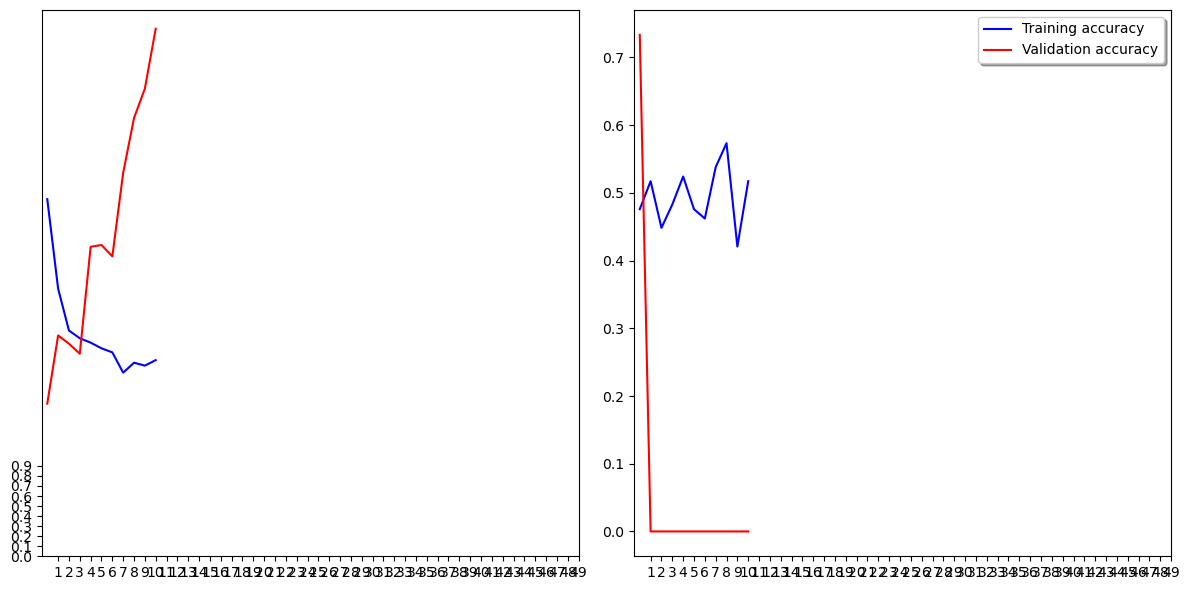

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
for i in range(10):
    all_test_images = os.listdir(r"C:\Users\hitesh sonar\OneDrive\Desktop\TOTAL\EDUNIX\Eduonix Tea\ASSIGEMNET\19 ASSIGNMENT 19\DS May - 05th Nov\Fire")
    random_image = random.choice(all_test_images)
    img = cv2.imread(r"C:\Users\hitesh sonar\OneDrive\Desktop\TOTAL\EDUNIX\Eduonix Tea\ASSIGEMNET\19 ASSIGNMENT 19\DS May - 05th Nov\Fire/"+random_image)
    img = cv2.resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH))
    
    org = img.copy()
    img = img.reshape(1,128,128,3)
    
    pred = model.predict(img)
    print(['NoFire','Fire'][int(pred[0][0])])
    cv2.imshow('Live predictions',org)
    cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 493ms/step
NoFire
